Nama : Umar Syaid Himawan
Email : himawan.masyaid@gmail.com
Dicoding : https://www.dicoding.com/users/himawanmasyaid



In [14]:
import tensorflow as tf

# Memastikan tensorflow yang digunakan adalah versi di atas 2.0.
print(tf.__version__)

2.5.0


Download data melalui link yang sudah disediakan oleh dicoding

In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-10 15:16:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  17.1MB/s    in 19s     

2021-06-10 15:16:44 (16.1 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Melakukan ekstraksi pada file zip

In [5]:
import zipfile

localZip = 'rockpaperscissors.zip'
zipRef = zipfile.ZipFile(localZip, 'r')
zipRef.extractall('/tmp/')
zipRef.close()

Membuat direktori untuk setiap jenis gambar

In [8]:
import os, shutil 

baseDir = '/tmp/rockpaperscissors'

trainDir = os.path.join(baseDir, 'train')
validationDir = os.path.join(baseDir, 'validation')

rockDir = os.path.join(baseDir, 'rock')
paperDir = os.path.join(baseDir, 'paper')
scissorsDir = os.path.join(baseDir, 'scissors')

print('total rock images : ', len(os.listdir(rockDir)))
print('total paper images : ', len(os.listdir(paperDir)))
print('total scissors images : ', len(os.listdir(scissorsDir)))

if os.path.exists(trainDir):
  shutil.rmtree(trainDir)

if os.path.exists(validationDir):
  shutil.rmtree(validationDir)

os.mkdir(trainDir)
os.mkdir(validationDir)

# train
rockTrain = os.path.join(trainDir, 'rock')
paperTrain = os.path.join(trainDir, 'paper')
scissorsTrain = os.path.join(trainDir, 'scissors')
# validation
rockValidation = os.path.join(validationDir, 'rock')
paperValidation = os.path.join(validationDir, 'paper')
scissorsValidation = os.path.join(validationDir, 'scissors')

os.mkdir(rockTrain)
os.mkdir(paperTrain)
os.mkdir(scissorsTrain)
os.mkdir(rockValidation)
os.mkdir(paperValidation)
os.mkdir(scissorsValidation)

total rock images :  726
total paper images :  712
total scissors images :  750


Split Direktori

In [9]:
from sklearn.model_selection import train_test_split

trainRockDir, valRockDir = train_test_split(os.listdir(rockDir), test_size = 0.40)
trainPaperDir, valPaperDir = train_test_split(os.listdir(paperDir), test_size = 0.40)
trainscissorsDir, valScissorsDir = train_test_split(os.listdir(scissorsDir), test_size = 0.40)

for file in trainRockDir:
  shutil.copy(os.path.join(rockDir, file), os.path.join(rockTrain, file))
for file in trainPaperDir:
  shutil.copy(os.path.join(paperDir,file), os.path.join(paperTrain,file))
for file in trainscissorsDir:
  shutil.copy(os.path.join(scissorsDir,file), os.path.join(scissorsTrain,file))
for file in valRockDir:
  shutil.copy(os.path.join(rockDir, file), os.path.join(rockValidation,file))
for file in valPaperDir:
  shutil.copy(os.path.join(paperDir,file), os.path.join(paperValidation,file))
for file in valScissorsDir:
  shutil.copy(os.path.join(scissorsDir,file), os.path.join(scissorsValidation,file))

print('\n Training \n')
print('total rock images : ', len(os.listdir(rockTrain)))
print('total paper images : ', len(os.listdir(paperTrain)))
print('total scissors images : ', len(os.listdir(scissorsTrain)))
print('total : ', len(os.listdir(rockTrain)) + len(os.listdir(paperTrain)) + len(os.listdir(scissorsTrain)) )

print('\n Validation \n')
print('total rock images : ', len(os.listdir(rockValidation)))
print('total paper images : ', len(os.listdir(paperValidation)))
print('total scissors images : ', len(os.listdir(scissorsValidation)))
print('total : ', len(os.listdir(rockValidation)) + len(os.listdir(paperValidation)) + len(os.listdir(scissorsValidation)) )


 Training 

total rock images :  435
total paper images :  427
total scissors images :  450
total :  1312

 Validation 

total rock images :  291
total paper images :  285
total scissors images :  300
total :  876


Menampilkan gambar

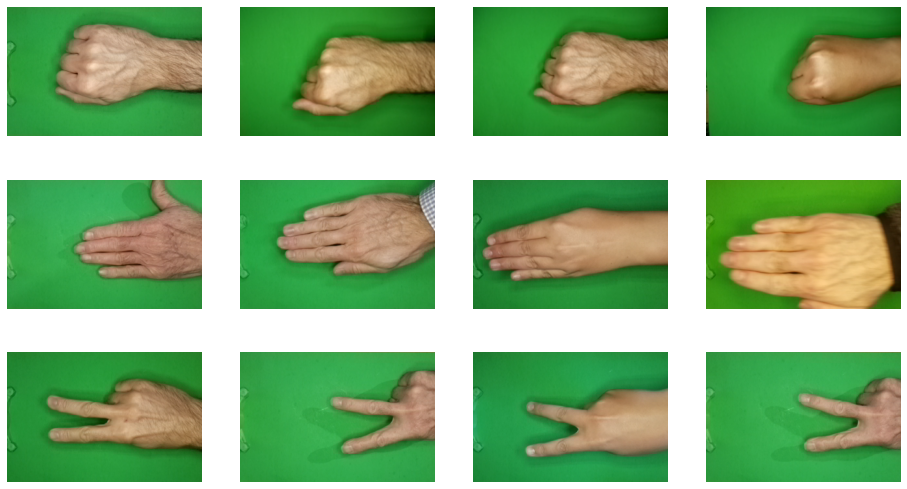

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rockFile = os.listdir(rockDir)
paperFile = os.listdir(paperDir)
scissorsFile = os.listdir(scissorsDir)

nrows = 3
ncols = 4

picIndex = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

picIndex += 4

rockImg = [os.path.join(rockDir, fname) 
                for fname in rockFile[picIndex-4:picIndex]]
paperImg = [os.path.join(paperDir, fname) 
                for fname in paperFile[picIndex-4:picIndex]]
scissorsImg = [os.path.join(scissorsDir, fname) 
                for fname in scissorsFile[picIndex-4:picIndex]]

for i, pathImg in enumerate(rockImg+paperImg+scissorsImg):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(pathImg)
  plt.imshow(img)

plt.show()



Data generator

In [32]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

trainDataGen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    fill_mode='nearest',
    validation_split = 0.2
)
validDataGen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    fill_mode='nearest',
    validation_split = 0.2
)


trainGenerator = trainDataGen.flow_from_directory(
    trainDir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
    shuffle=True
)

validationGenerator = validDataGen.flow_from_directory(
    validationDir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Membuat Model

In [33]:
# Model Architecture
model = tf.keras.models.Sequential([
    # first
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)             

# Model Optimizer and Loss Function

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


# Class Callback digunakan untuk stop training ketika akurasi diatas 96%

In [35]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\n Akurasi diatas 96% \n")
      self.model.stop_training = True

callbacks = Callback()

# Melatih Model

In [36]:
history = model.fit(
    trainGenerator,
    steps_per_epoch = 25,
    epochs = 40,
    validation_data = validationGenerator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/40
25/25 - 29s - loss: 1.1133 - accuracy: 0.3512 - val_loss: 1.0837 - val_accuracy: 0.5688
Epoch 2/40
25/25 - 28s - loss: 1.0091 - accuracy: 0.5038 - val_loss: 1.1779 - val_accuracy: 0.4625
Epoch 3/40
25/25 - 28s - loss: 0.8524 - accuracy: 0.6375 - val_loss: 0.7299 - val_accuracy: 0.7875
Epoch 4/40
25/25 - 28s - loss: 0.7670 - accuracy: 0.6938 - val_loss: 0.5464 - val_accuracy: 0.8375
Epoch 5/40
25/25 - 28s - loss: 0.5699 - accuracy: 0.7850 - val_loss: 0.6468 - val_accuracy: 0.7188
Epoch 6/40
25/25 - 28s - loss: 0.4257 - accuracy: 0.8350 - val_loss: 0.6203 - val_accuracy: 0.7625
Epoch 7/40
25/25 - 27s - loss: 0.4283 - accuracy: 0.8525 - val_loss: 0.3059 - val_accuracy: 0.8813
Epoch 8/40
25/25 - 28s - loss: 0.3823 - accuracy: 0.8700 - val_loss: 0.4842 - val_accuracy: 0.7937
Epoch 9/40
25/25 - 28s - loss: 0.2866 - accuracy: 0.8925 - val_loss: 0.1205 - val_accuracy: 0.9563
Epoch 10/40
25/25 - 28s - loss: 0.2836 - accuracy: 0.9062 - val_loss: 0.6893 - val_accuracy: 0.7188
Epoch 11/

# Visualisasi Model

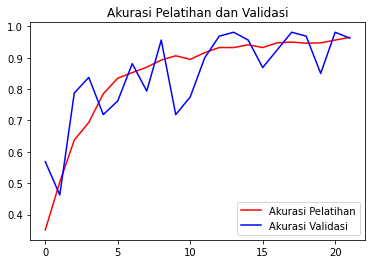

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
accVal = history.history['val_accuracy']
lossVal = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Pelatihan')
plt.plot(epochs, accVal, 'b', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.legend(loc=0)
plt.figure()


plt.show()

# Menguji Model

Saving kertas.jpg to kertas.jpg
kertas.jpg
paper


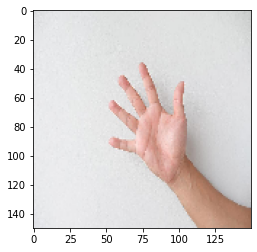

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #urutan CLass nya yaitu [Paper, Rock, Scissors]
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')